# Лабораторная работа №6
##  Исследование неявных методов решения жёстких систем дифференциальных уравнений
---  
### Цель: Оценка точности неявных методов решения жёстких (почти жестких) системы дифференциальных уравнений
---
#### Для исследования выберем пункт X.9.11: 
$$
\begin{cases}
y_{1}' = -1.71y_{1} + 0.43y_{2} + 8.23y_{3} + 0.0007, \\
y_{2}' =  1.71y_{1} - 8.75y_{2} \\
y_{3}' = -10.03y_{3} + 0.43y_{4} + 0.035y_{5} \\
y_{4}' =  8.32y_{2} + 1.71y_{3} - 1.12y_{4} \\
y_{5}' = -1.745y_{5} + 0.43y_{6} + 0.43y_{7} \\
y_{6}' = -280y_{6}y_{8} + 0.69y_{4} + 1.71y_{5} - 0.43y_{6} + 0.69y_{7} \\
y_{7}' =  280y_{6}y_{8} - 1.87y_{7} \\
y_{8}' = -y_{7}' 
\end{cases}
$$

В исследовании будем использовать неявный метод Рунге-Кутта

#### Импорт модулей:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Предварительная инициализация:

In [2]:
t_0 = 0
t_k = 421.8122
point_0 = np.array([1, 0, 0, 0, 0, 0, 0, 0.0057])

c_1 = np.array (([0.7886751345948128, 0], [-0.5773502691896257, 0.7886751345948128]))

c_2 = np.array ([0.5, 0.5])

#### Объявление функций: 

In [3]:
def f(point):
    return np.array([-1.71 * point[0] + 0.43 * point[1] + 8.23 * point[2] + 0.0007, 
                     1.71 * point[0] - 8.75 * point[1],
                     -10.03 * point[2] + 0.43 * point[3] + 0.035 * point[4],
                     8.32 * point[1] + 1.71 * point[2] - 1.12 * point[3],
                     -1.745 * point[4] + 0.43 * point[5] + 0.43 * point[6],
                     -280 * point[5] * point[7] + 0.69 * point[3] + 1.71 * point[4] - 0.43 * point[5] + 0.69 * point[6],
                     280 * point[5] * point[7] - 1.87 * point[6],
                     1.87 * point[6] - 280 * point[5] * point[7]])

def implicit_rk(point_0, it_num):
    print('Step is defined by time interval and custom number of iterations')  
    step = (t_k - t_0) / it_num
    print('step : ' + str(step))

    print('------------------------------')

    print('We\'d build a phase trajectory step by step'
          'beginning with point_0')
    phase_traj = [point_0]
    point = point_0
    phase_traj.append(point)
    i = 0

    print('------------------------------')

    print('start value for evaluating process: ')
    print(point)

    print('the main calculating process...')
    while (i < it_num):
        c = [np.zeros (len (point)), np.zeros (len (point))]
        j = 0
        while (j < 2):
            c = [f(point + (step / 100) * (c_1[0] [0] * c [0] + c_1[0] [1] * c [1])), 
                 f(point + (step / 100) * (c_1[1] [0] * c [0] + c_1[1] [1] * c [1]))]
            j += 1
        point = point + (step / 50) * (c_2[0] * c [0] + c_2[1] * c [1])
        phase_traj.append (point)
        i += 1
    return phase_traj

#### Основная часть

Set start and final value for time
start time: 0
final time: 421.8122
------------------------------
We want to solve the system with Implicit Runge-Kutta method
Start point : 
[1.     0.     0.     0.     0.     0.     0.     0.0057]
------------------------------
Butcher table
[[ 0.78867513  0.        ]
 [-0.57735027  0.78867513]]
------------------------------
[0.5 0.5]
Step is defined by time interval and custom number of iterations
step : 0.04218122
------------------------------
We'd build a phase trajectory step by stepbeginning with point_0
------------------------------
start value for evaluating process: 
[1.     0.     0.     0.     0.     0.     0.     0.0057]
the main calculating process...
------------------------------
creating plot...


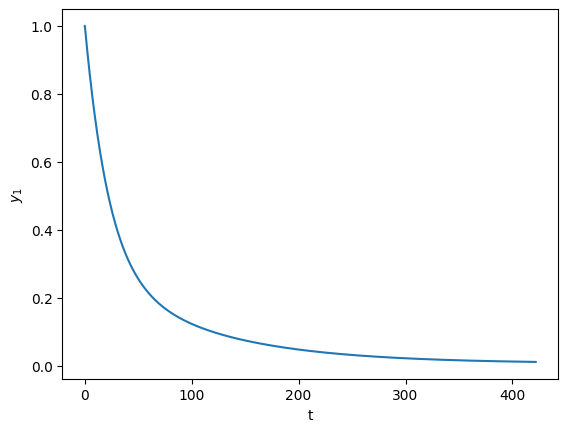

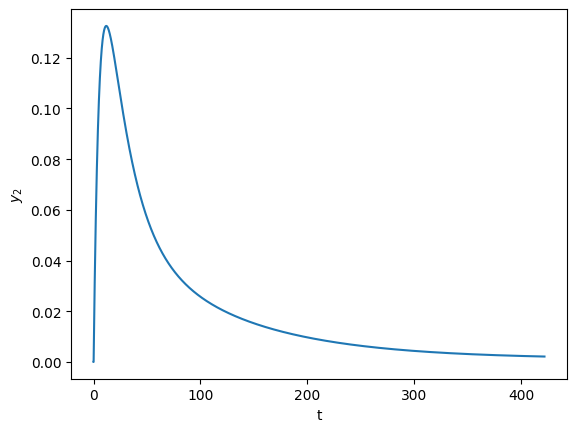

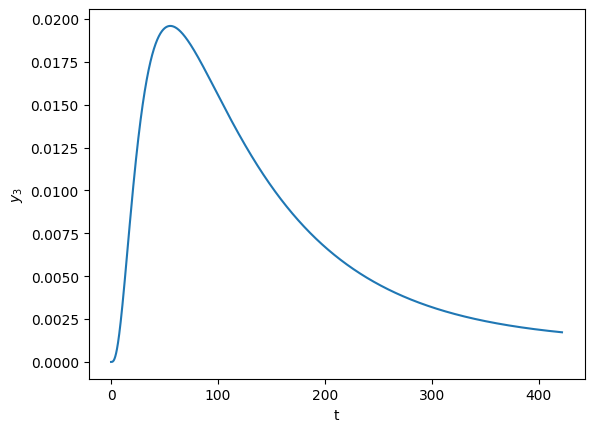

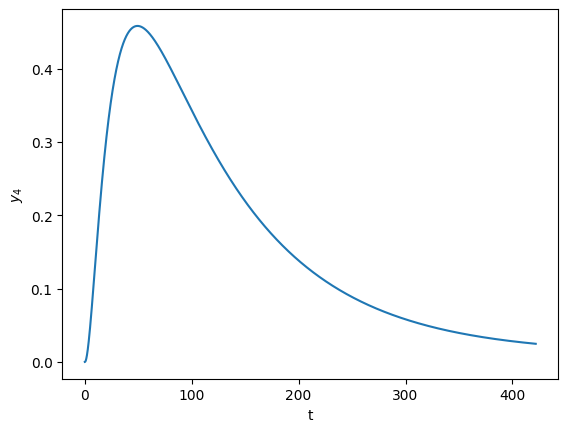

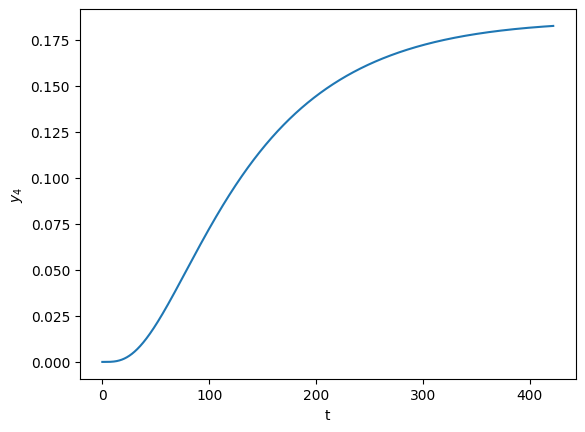

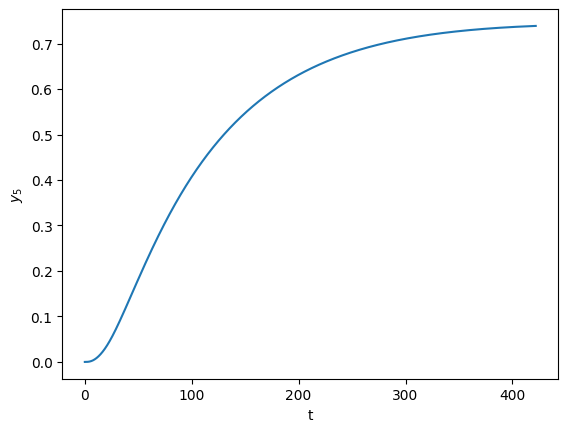

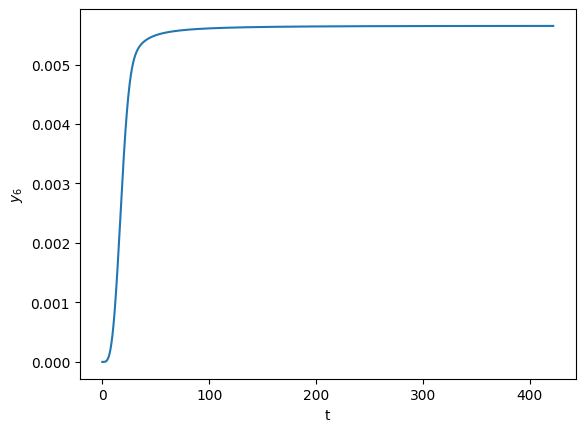

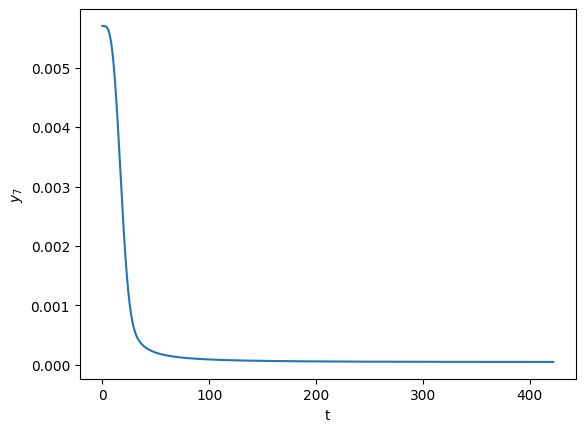

In [4]:
def main():
    print('Set start and final value for time')
    print('start time: ' + str(t_0))
    print('final time: ' + str(t_k))

    print('------------------------------')

    print('We want to solve the system with Implicit Runge-Kutta method')
    print('Start point : ')
    print(point_0)

    print('------------------------------')

    print('Butcher table')
    print(c_1)
    print('------------------------------')
    print(c_2)

    phase_traj = implicit_rk(point_0, 10000)

    print('------------------------------')

    print('creating plot...')
    t = np.linspace (0, t_k, num=len(phase_traj))
    plt.plot(t, [item[0] for item in phase_traj])
    plt.xlabel('t')
    plt.ylabel(r'$y_1$')
    plt.show()

    plt.plot(t, [item[1] for item in phase_traj])
    plt.xlabel('t')
    plt.ylabel(r'$y_2$')
    plt.show()

    plt.plot(t, [item[2] for item in phase_traj])
    plt.xlabel('t')
    plt.ylabel(r'$y_3$')
    plt.show()

    plt.plot(t, [item[3] for item in phase_traj])
    plt.xlabel('t')
    plt.ylabel(r'$y_4$')
    plt.show()

    plt.plot(t, [item[4] for item in phase_traj])
    plt.xlabel('t')
    plt.ylabel(r'$y_4$')
    plt.show()

    plt.plot(t, [item[5] for item in phase_traj])
    plt.xlabel('t')
    plt.ylabel(r'$y_5$')
    plt.show()

    plt.plot(t, [item[6] for item in phase_traj])
    plt.xlabel('t')
    plt.ylabel(r'$y_6$')
    plt.show()

    plt.plot(t, [item[7] for item in phase_traj])
    plt.xlabel('t')
    plt.ylabel(r'$y_7$')
    plt.show()

main()

## Заключение
В данной работе для исходной системы методы Рунге-Кутты и Адамса 4-го порядка оказались высоко точными. Отметим эквивалентный резлуьтат для первого и второго методов